<a href="https://colab.research.google.com/github/usmeda/Data_Sc_Pro/blob/main/SEMimageprefeaFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

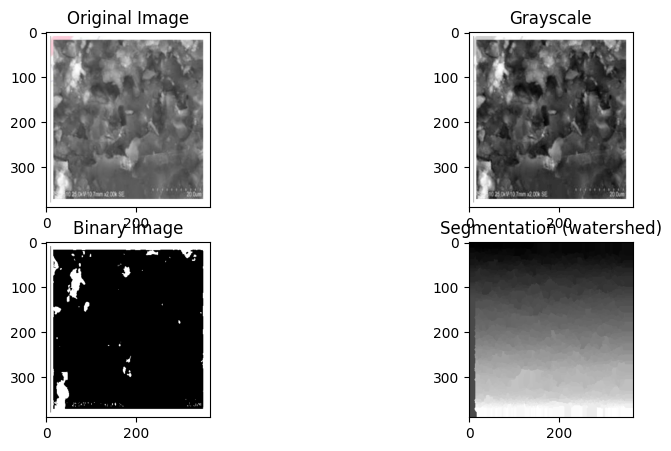

In [ ]:
from skimage.color import rgb2gray
from skimage.filters import median, threshold_otsu
from skimage.segmentation import watershed
from skimage.morphology import binary_opening, binary_closing
import matplotlib.pyplot as plt
import numpy as np

#loading the image
image = plt.imread("/content/image_prepro-BEFORE.png")

# Convert RGB to grayscale
image_rgb = image[:, :, :3]
grayscale_image = rgb2gray(image_rgb)

# Binarization
thresh = threshold_otsu(grayscale_image)
binary_image = grayscale_image > thresh

# Segment image (watershed )
segmented_image = watershed(grayscale_image, markers=None)

# Visualize results
plt.figure(figsize=(10, 5))

plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(222)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale')

plt.subplot(223)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary image')

plt.subplot(224)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentation (watershed)')

plt.show()

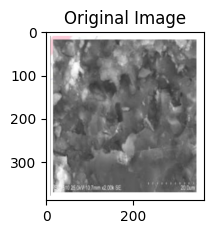

In [ ]:
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.show()

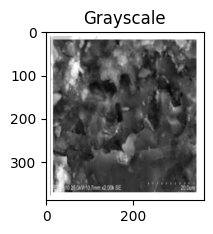

In [ ]:
plt.subplot(222)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale')

plt.show()

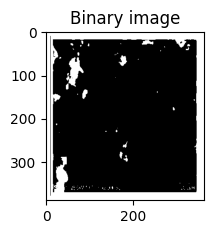

In [ ]:
plt.subplot(223)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary image')

plt.show()

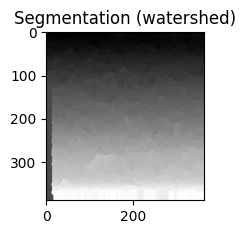

In [ ]:
plt.subplot(224)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentation (watershed)')

plt.show()

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
grayscale_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

# Convert to 8-bit unsigned integer
grayscale_image = np.uint8(grayscale_image * 255)

# Otsu's thresholding
ret, itz_mask = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

thresh = cv2.adaptiveThreshold(grayscale_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Mask refinement
kernel = np.ones((3, 3), np.uint8)
itz_mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

white_pixels = cv2.countNonZero(itz_mask)
total_pixels = itz_mask.shape[0] * itz_mask.shape[1]
itz_volume_fraction = white_pixels / total_pixels

print("ITZ Volume Fraction:", itz_volume_fraction)
#average or one location, visualization

ITZ Volume Fraction: 0.35017066854990586


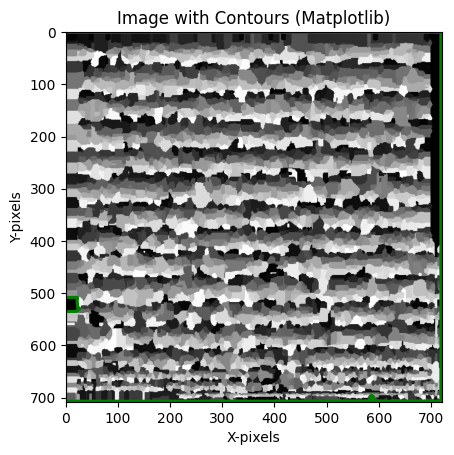

   Aggregate Area (pixels)  Aggregate Diameter (pixels)
0                 507650.0                  1008.370178


In [ ]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Convert the segmented image to a CV_8UC1 image
segmented_image = np.uint8(segmented_image)

# Find contours of segmented objects
cnts = cv2.findContours(segmented_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Initialize lists to store data
aggregate_areas = []
aggregate_diameters = []

# Loop through contours (assuming each represents an aggregate)
for c in cnts:
  # Get area and diameter
  area = cv2.contourArea(c)
  diameter = cv2.minEnclosingCircle(c)[1] * 2
  aggregate_areas.append(area)
  aggregate_diameters.append(diameter)

# Analyze Aggregate Distribution
# Convert image to RGB for Matplotlib (assuming grayscale)
image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_GRAY2RGB)

# Create a new figure for plotting
fig, ax = plt.subplots()

# Plot the grayscale image
ax.imshow(image_rgb, cmap='gray')

# Iterate through contours and draw them on the plot
for c in cnts:
  # Convert contour points to numpy array
  contour_points = np.array(c, dtype=np.float32)


# Remove extra dimension (if present)
  contour_points = contour_points.squeeze()

# Close the contour
  contour_points = np.vstack([contour_points, contour_points[0]])

  # Draw the contour in green with a linewidth of 2
  ax.plot(contour_points[:, 0], contour_points[:, 1], color='green', linewidth=2)
  contour_points = np.vstack([contour_points, contour_points[0]])
  # Draw the contour in green with a linewidth of 2
  ax.plot(contour_points[:, 0], contour_points[:, 1], color='green', linewidth=2)

# Set axis limits
ax.set_xlim(0, image.shape[1])
ax.set_ylim(image.shape[0], 0)  # Invert y-axis for image display convention

# Set labels and title
ax.set_xlabel("X-pixels")
ax.set_ylabel("Y-pixels")
ax.set_title("Image with Contours (Matplotlib)")

# Show the plot
plt.show()

# Compile data into a pandas DataFrame
data = {
    "Aggregate Area (pixels)": aggregate_areas,
    "Aggregate Diameter (pixels)": aggregate_diameters,
}

df = pd.DataFrame(data)
print(df.to_string())
#how can we use this, look at composition, look at particle size of distibution

In [ ]:
!pip install opencv-python-headless[contrib]

Number of Microcracks: 7
Average Crack Length (pixels): 155.39732905796595


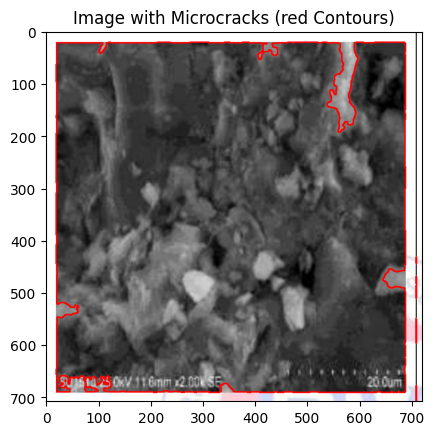

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # For visualization

# Assuming you have the pre-processed grayscale image as 'image'

# Apply image filtering (optional)
blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)  # Adjust kernel size as needed

# Apply thresholding to create a binary image
ret, thresh = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours of potential cracks (assuming lighter pixels represent cracks)
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Analyze microcracks (optional)
crack_lengths = []

# Option 1: Minimum Enclosing Circle (simpler)
for c in cnts:
  (x, y), radius = cv2.minEnclosingCircle(c)
  crack_length = 2 * radius  # Estimate crack length as diameter of circle
  crack_lengths.append(crack_length)


# Print results (optional)
print("Number of Microcracks:", len(cnts))
if crack_lengths:
  print("Average Crack Length (pixels):", np.mean(crack_lengths))

# Visualization using Matplotlib (works everywhere)
image_copy = image.copy()  # Create a copy for drawing
cv2.drawContours(image_copy, cnts, -1, (255, 0, 0), 2)  # Draw in red

plt.imshow(image_copy, cmap='gray')
plt.title("Image with Microcracks (red Contours)")
plt.show()


Number of Microcracks: 7
Average Crack Length (pixels): 155.39732905796595


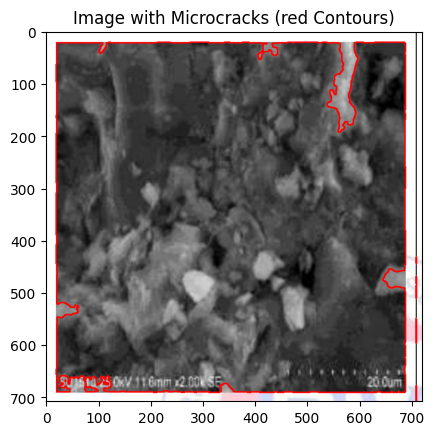

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # For visualization

# Assuming you have the pre-processed grayscale image as 'image'

# Apply image filtering (optional)
blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)  # Adjust kernel size as needed

# Otsu's thresholding
ret, itz_mask = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

thresh = cv2.adaptiveThreshold(grayscale_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Apply thresholding to create a binary image
ret, thresh = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours of potential cracks (assuming lighter pixels represent cracks)
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Analyze microcracks (optional)
crack_lengths = []

# Option 1: Minimum Enclosing Circle (simpler)
for c in cnts:
  (x, y), radius = cv2.minEnclosingCircle(c)
  crack_length = 2 * radius  # Estimate crack length as diameter of circle
  crack_lengths.append(crack_length)


# Print results (optional)
print("Number of Microcracks:", len(cnts))
if crack_lengths:
  print("Average Crack Length (pixels):", np.mean(crack_lengths))

# Visualization using Matplotlib (works everywhere)
image_copy = image.copy()  # Create a copy for drawing
cv2.drawContours(image_copy, cnts, -1, (255, 0, 0), 2)  # Draw in red

plt.imshow(image_copy, cmap='gray')
plt.title("Image with Microcracks (red Contours)")
plt.show()


In [ ]:
import cv2
import numpy as np


def analyze_porosity(binary_image):

  # Calculate total area
  total_area = binary_image.shape[0] * binary_image.shape[1]

  # Count black pixels (pores)
  pore_area = np.sum(binary_image == 0)

  # Calculate porosity
  porosity = (pore_area / total_area) * 100

  return porosity


# Example usage (assuming you have the binary image loaded as 'binary_image')
porosity = analyze_porosity(binary_image)

# Print porosity value
print(f"Porosity: {porosity:.2f}%")

#difference between itz and porosituy


Porosity: 74.55%


In [ ]:
import cv2
import numpy as np
from scipy import ndimage

def analyze_pore_size_distribution(image, min_pore_size=10):

  # Binarization with Otsu's thresholding (adjust min_val if needed)
  # Convert image to CV_8UC1 if necessary
  if image.dtype != np.uint8:
     image = image.astype(np.uint8)  # Convert to 8-bit unsigned integer

  # Distance transform (background becomes foreground markers)
  distance_transform = ndimage.distance_transform_edt(binary_image)

  # Identify local maxima as pore centers (optional threshold for noise reduction)
  local_maxima = ndimage.maximum_filter(distance_transform, size=3)
  pore_centers = np.where(local_maxima == distance_transform)

  # Filter out small regions (potential noise) based on minimum pore size
  filtered_centers = []
  filtered_radii = []
  for row, col in zip(*pore_centers):
    if distance_transform[row, col] >= min_pore_size:  # Consider minimum distance
      filtered_centers.append((row, col))
      filtered_radii.append(distance_transform[row, col])

  # Calculate average pore size and normalize histogram (optional binning)
  num_identified_pores = len(filtered_radii)
  if num_identified_pores > 0:
    average_pore_size = np.mean(filtered_radii)
    pore_size_distribution, bins = np.histogram(filtered_radii, bins=np.linspace(0, distance_transform.max(), 20))
    pore_size_distribution = pore_size_distribution / np.sum(pore_size_distribution)
  else:
    average_pore_size = 0.0
    pore_size_distribution = np.zeros_like(bins[:-1])  # Empty histogram

  return {
      "average_pore_size": average_pore_size,
      "pore_size_distribution": pore_size_distribution,
      "num_identified_pores": num_identified_pores,
  }

results = analyze_pore_size_distribution(grayscale_image, min_pore_size=15)  # Adjust min_pore_size if needed

# Print pore size analysis results
print("Average Pore Size:", results["average_pore_size"], "pixels")
print("Number of Identified Pores:", results["num_identified_pores"])

#how related to other two
#can we use the data interpolation for images to increase number of data points
#look for papers

Average Pore Size: 19.184457446781916 pixels
Number of Identified Pores: 77
